In [2364]:
import sys
import os
from typing import Tuple
import pandas

sys.path.append('/home/danillorp/Área de Trabalho/github/fema/src/')


import fema_semi
import fema_classifier
import fema_regression
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2365]:
def generate_random_points_2d(n_points):
    """
    Generate N random points in 2D space.
    
    Parameters:
    n_points (int): Number of random points to generate.
    
    Returns:
    numpy.ndarray: Array of shape (n_points, 2) containing random 2D points.
    """
    # Generate random x and y coordinates in the range [0, 100)
    x_coords = np.random.rand(n_points) * 100
    y_coords = np.random.rand(n_points) * 100
    
    # Combine x and y coordinates into a single array
    points = np.column_stack((x_coords, y_coords))
    
    return points

    

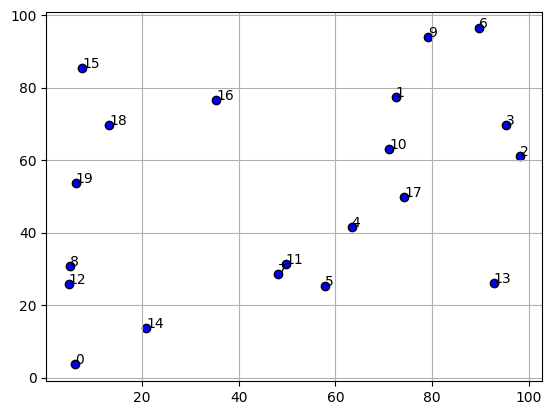

In [2366]:
# Number of random points to generate
N = 20

# Generate random 2D points
points = generate_random_points_2d(N)

fig, ax = plt.subplots()

# Plot the generated points
ax.scatter(points[:, 0], points[:, 1], c='blue', marker='o', edgecolors='black')
#ax.title(f'{N} Random 2D Points')
#ax.xlabel('X Coordinate')
#ax.ylabel('Y Coordinate')
ax.grid(True)

for i, txt in enumerate(range(N)):
    ax.annotate(txt, (points[i,0], points[i,1]))

plt.show()

In [2367]:
points_list = points.tolist()
points_list_aux = points_list.copy()

dist_matrix = np.zeros((N, N))
weigth_matrix = np.zeros((N, N))


z = 2

for (p,ind) in zip(points_list,range(0,len(points_list))):
    dist = np.array(
            [np.linalg.norm(points[i]-p) for i in range(len(points))]
            )
    dist_matrix[ind,:] = dist
    dist_matrix[ind,ind] = 10**20

    weigth_matrix[ind,:] = 1.0/(dist_matrix[ind,:]**z)
    weigth_matrix[ind,:] = weigth_matrix[ind,:]/sum(weigth_matrix[ind,:]+1**-20)


    
print(dist_matrix)
print('\n')
print(weigth_matrix)
      
        

[[1.00000000e+20 9.91468922e+01 1.08516562e+02 1.10885234e+02
  6.86110235e+01 5.60099341e+01 1.24877543e+02 4.88647770e+01
  2.70829924e+01 1.16208824e+02 8.80514986e+01 5.15934768e+01
  2.22782559e+01 8.94605517e+01 1.78712005e+01 8.18069081e+01
  7.87574742e+01 8.23526353e+01 6.64741617e+01 5.01909534e+01]
 [9.91468922e+01 1.00000000e+20 3.02834592e+01 2.41140302e+01
  3.70070716e+01 5.40711653e+01 2.57313173e+01 5.45002833e+01
  8.20253189e+01 1.80022599e+01 1.43158462e+01 5.13890737e+01
  8.50114195e+01 5.50841134e+01 8.18735153e+01 6.52700560e+01
  3.70494463e+01 2.74582087e+01 5.96645398e+01 7.02306244e+01]
 [1.08516562e+02 3.02834592e+01 1.00000000e+20 8.80162904e+00
  3.99608796e+01 5.40106593e+01 3.60531942e+01 5.96788342e+01
  9.80020929e+01 3.79037989e+01 2.70798152e+01 5.69244675e+01
  9.97886161e+01 3.55273497e+01 9.06654774e+01 9.35956593e+01
  6.45844220e+01 2.64034646e+01 8.52492278e+01 9.21254879e+01]
 [1.10885234e+02 2.41140302e+01 8.80162904e+00 1.00000000e+20
  4.2

In [2368]:
conquest = np.zeros(N)
conquested = np.zeros(N)
splited = np.zeros(N)

for i in range(len(points)):
   if i == 36:
      print(np.argsort(weigth_matrix[i,:])[N-1])
   conquest[i] = np.argsort(weigth_matrix[i,:])[N-1]
   splited[i]  = np.argsort(weigth_matrix[i,:])[1]

print(conquest)
print(splited)

for i in range(len(points)):
   if (i == int(conquest[int(conquest[i])])) & (i != int(splited[int(conquest[i])])):
      if i <= int(conquest[i]):
         conquested[i] = i
         conquested[int(conquest[i])] = i
         print(i,int(conquest[i]),int(conquest[int(conquest[i])]))
      else:
         print('passou',i,int(conquest[i]),int(conquest[int(conquest[i])]))
         #conquested[i] = i
   else:
      print('NAO ',i,int(conquest[i]),int(conquest[int(conquest[i])]))
      conquested[i] = i

print(conquest)
print(conquested)


[14. 10.  3.  2. 17. 11.  9. 11. 12.  6. 17.  7.  8. 17.  0. 18. 18. 10.
 15. 18.]
[ 6.  0.  0.  0. 15. 15.  0.  6.  6.  0.  0.  6.  6. 15.  6. 13.  0.  0.
 13.  6.]
0 14 0
NAO  1 10 17
2 3 2
passou 3 2 3
NAO  4 17 10
NAO  5 11 7
6 9 6
7 11 7
8 12 8
passou 9 6 9
10 17 10
passou 11 7 11
passou 12 8 12
NAO  13 17 10
passou 14 0 14
15 18 15
NAO  16 18 15
passou 17 10 17
passou 18 15 18
NAO  19 18 15
[14. 10.  3.  2. 17. 11.  9. 11. 12.  6. 17.  7.  8. 17.  0. 18. 18. 10.
 15. 18.]
[ 0.  1.  2.  2.  4.  5.  6.  7.  8.  6. 10.  7.  8. 13.  0. 15. 16. 10.
 15. 19.]


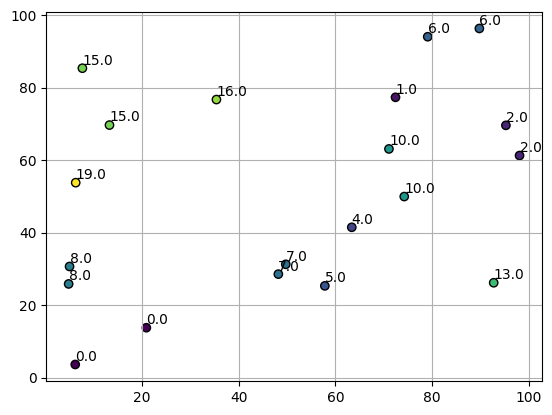

In [2369]:
fig, ax = plt.subplots()

# Plot the generated points
ax.scatter(points[:, 0], points[:, 1], c=conquested, marker='o', edgecolors='black')
#ax.title(f'{N} Random 2D Points')
#ax.xlabel('X Coordinate')
#ax.ylabel('Y Coordinate')
ax.grid(True)

for i in range(len(conquested)):
    ax.annotate(conquested[i], (points[i,0], points[i,1]+1))

plt.show()

In [2370]:
nivel_1 = np.zeros(len(set(conquested)))

for i,j in enumerate(set(conquested)):
    print(i,j)
    print(np.where(conquested == j)[0].tolist())
    print(weigth_matrix[np.where(conquested == j)[0].tolist(),0])


0 0.0
[0, 14]
[4.99760706e-42 1.56452288e-04]
1 1.0
[1]
[5.08191402e-06]
2 2.0
[2, 3]
[4.24139228e-06 4.06186183e-06]
3 4.0
[4]
[1.06095286e-05]
4 5.0
[5]
[1.59145918e-05]
5 6.0
[6, 9]
[3.20385941e-06 3.69926963e-06]
6 7.0
[7, 11]
[2.08128273e-05 1.86682730e-05]
7 8.0
[8, 12]
[6.79904071e-05 1.00477856e-04]
8 10.0
[10, 17]
[6.44216184e-06 7.36453118e-06]
9 13.0
[13]
[6.24515083e-06]
10 15.0
[15, 18]
[7.46790138e-06 1.13077479e-05]
11 16.0
[16]
[8.05703349e-06]
12 19.0
[19]
[1.98363898e-05]


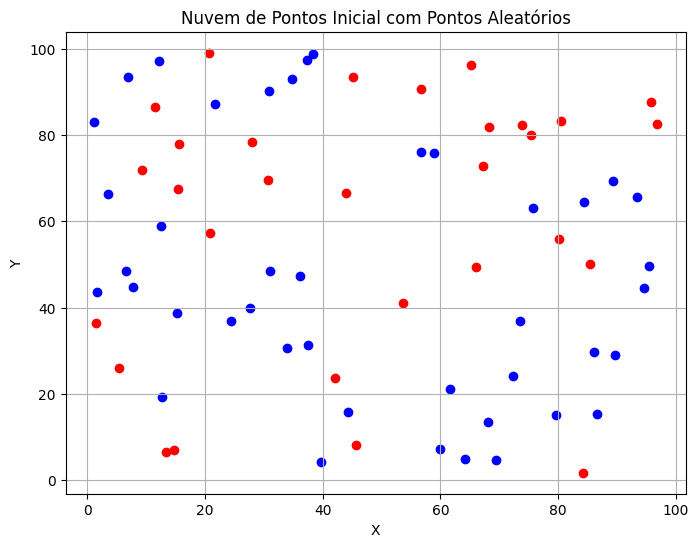

In [2371]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar pontos aleatórios
def generate_random_points(min_x, max_x, min_y, max_y, num_points):
    return np.random.uniform(min_x, max_x, num_points), np.random.uniform(min_y, max_y, num_points)

# Função para filtrar pontos próximos aos pontos de NP
def filter_nearby_points(random_x, random_y, np_x, np_y, min_distance):
    filtered_x, filtered_y = [], []
    
    for x, y in zip(random_x, random_y):
        # Verifica a distância mínima entre o ponto aleatório e os pontos de NP
        distances = np.sqrt((np_x - x)**2 + (np_y - y)**2)
        
        if np.all(distances >= min_distance):
            filtered_x.append(x)
            filtered_y.append(y)
    
    return filtered_x, filtered_y


def lists_to_np_array(list1, list2):
    # Convertendo as listas para arrays NumPy
    array1 = np.array(list1)
    array2 = np.array(list2)
    
    # Unindo os arrays em um array 2D
    coordinates = np.column_stack((array1, array2))
    
    return coordinates


N = 30
points = generate_random_points_2d(N)

# Nuvem de pontos inicial (NP)
np_x = points[:,0]
np_y = points[:,1]

# Coordenadas mínimas e máximas
min_x, max_x = np.min(np_x) - 1, np.max(np_x) + 1
min_y, max_y = np.min(np_y) - 1, np.max(np_y) + 1

# Número de pontos aleatórios
num_points = 2*N

# Distância mínima dos pontos gerados em relação aos pontos de NP
min_distance = 7.0

# Gerar pontos aleatórios
random_x, random_y = generate_random_points(min_x, max_x, min_y, max_y, num_points)

# Filtrar pontos próximos aos pontos de NP
filtered_x, filtered_y = filter_nearby_points(random_x, random_y, np_x, np_y, min_distance)

# Plotar pontos
plt.figure(figsize=(8, 6))
plt.scatter(np_x, np_y, color='red', label='Nuvem de Pontos Inicial (NP)')
plt.scatter(filtered_x, filtered_y, color='blue', label='Pontos Aleatórios')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nuvem de Pontos Inicial com Pontos Aleatórios')
#plt.legend()
plt.grid(True)
plt.show()


In [2372]:
samples = points.copy()
non_samples = lists_to_np_array(filtered_x, filtered_y)

print(samples.shape,non_samples.shape,len(filtered_y))

joined_samples = np.concatenate((samples, non_samples))

print(joined_samples.shape)

labels = np.zeros(joined_samples.shape[0],dtype=int)
labels[:samples.shape[0]] = 1
labels[samples.shape[0]:] = 0
print(labels)
print(labels.shape)




(30, 2) (42, 2) 42
(72, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(72,)


Primeiros 10 pontos:
[[ 1.47730028 36.46612855]
 [53.63898431 40.97117833]
 [84.24477623  1.71365113]
 [20.94070104 57.27261509]
 [15.53735048 78.05480043]
 [ 5.38324459 26.02314847]
 [ 9.29005967 71.83008827]
 [80.48079403 83.32922568]
 [43.97760124 66.57337769]
 [95.78443319 87.56925198]]


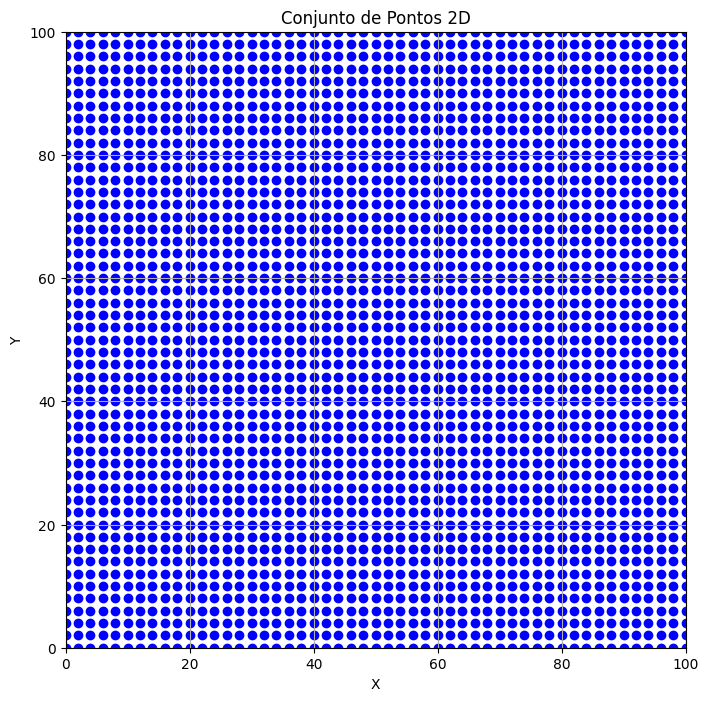

In [2373]:
# Definindo os limites do espaço
x_min, x_max = 0, 100
y_min, y_max = 0, 100

# Definindo o passo
step = 2

# Gerando os pontos usando np.meshgrid
x_values = np.arange(x_min, x_max + step, step)
y_values = np.arange(y_min, y_max + step, step)

xx, yy = np.meshgrid(x_values, y_values)

# Convertendo os pontos gerados em um único conjunto de pontos 2D
test = np.column_stack((xx.ravel(), yy.ravel()))

print("Primeiros 10 pontos:")
print(points[:10])

# Plotando os pontos (opcional)
plt.figure(figsize=(8, 8))
plt.scatter(test[:, 0], test[:, 1],  c='blue')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Pontos 2D')
plt.grid(True)
plt.show()

In [2374]:
model = fema_classifier.FEMaClassifier(k=10,basis=fema_regression.Basis.shepardBasis)
model.fit(joined_samples,labels.reshape((len(labels),1)))



pred, prob = model.predict(test,3)


In [2375]:
model.probability_classes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

51


(array([1430.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1171.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

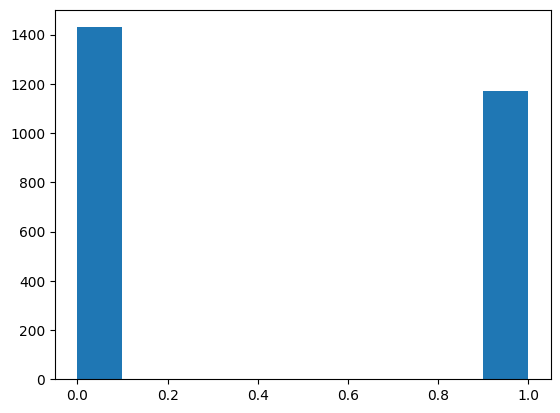

In [2376]:
np.unique(pred)
print(len(xx))
plt.hist(pred)

(array([1430.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1171.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

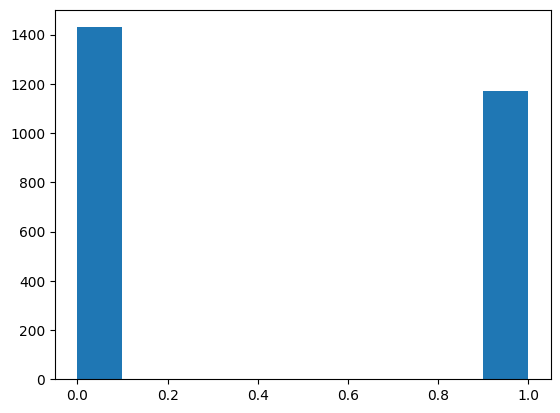

In [2377]:
pred_img = np.array(pred).reshape((xx.shape[0],yy.shape[0]))
pred_img = pred_img


plt.hist(pred_img.ravel())

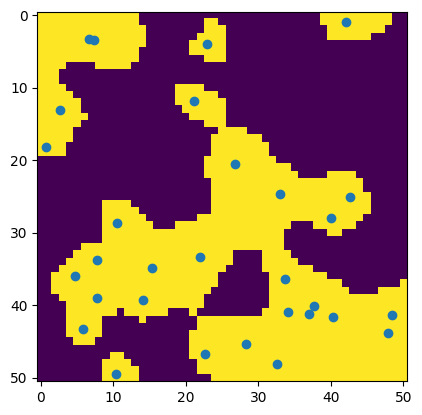

In [2378]:
plt.imshow(pred_img)
plt.scatter(points[:,0]/2,points[:,1]/2)

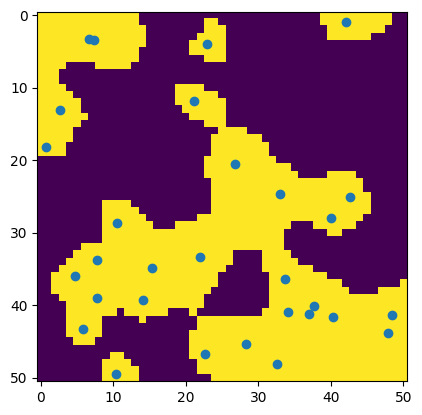

In [2379]:
pred_img_th = np.where(pred_img > 0.1, 1, 0)

plt.imshow(pred_img_th)
plt.scatter(points[:,0]/2,points[:,1]/2)

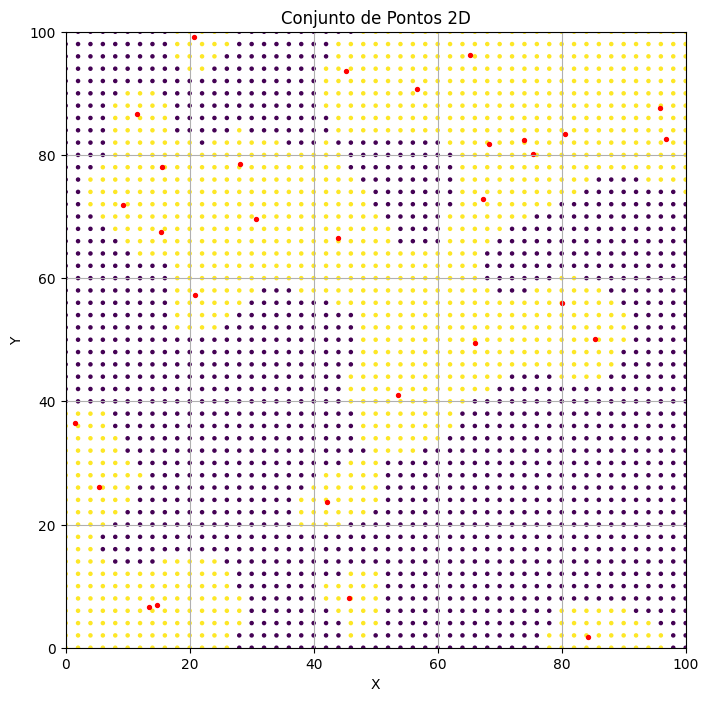

In [2380]:
# Plotando os pontos (opcional)
plt.figure(figsize=(8, 8))
plt.scatter(test[:, 0], test[:, 1], s=5, c=pred)
plt.scatter(points[:, 0], points[:, 1], s=8, c='red')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Pontos 2D')
plt.grid(True)
plt.show()

In [2381]:
prob

array([[0.19199271, 0.80800597],
       [0.16018204, 0.83981698],
       [0.11921825, 0.88078104],
       ...,
       [0.07418543, 0.92581359],
       [0.07605386, 0.92394509],
       [0.08056907, 0.91942977]])

(array([773., 239., 147., 147., 124., 138., 129., 131., 218., 555.]),
 array([0.        , 0.09999985, 0.19999969, 0.29999954, 0.39999938,
        0.49999923, 0.59999907, 0.69999892, 0.79999876, 0.89999861,
        0.99999846]),
 <BarContainer object of 10 artists>)

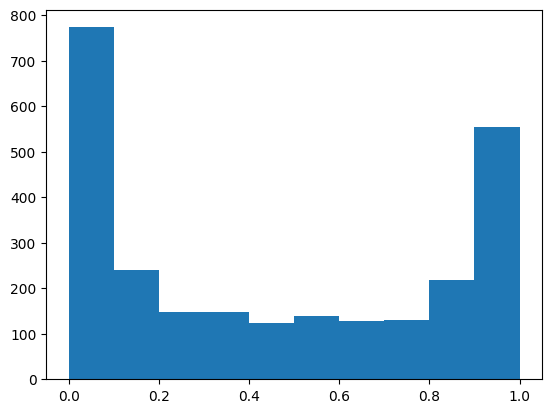

In [2382]:
pred_img = np.array(prob[:,1]).reshape((xx.shape[0],yy.shape[0]))
pred_img = pred_img


plt.hist(pred_img.ravel())

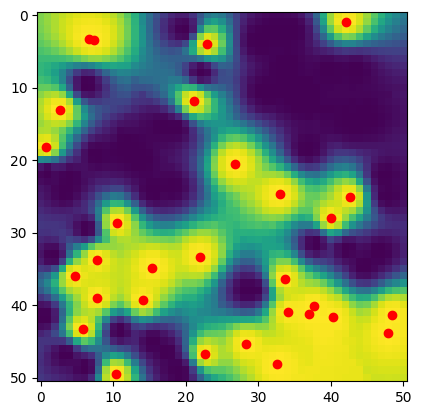

In [2383]:
plt.imshow(pred_img)
plt.scatter(points[:,0]/2,points[:,1]/2,c='red')

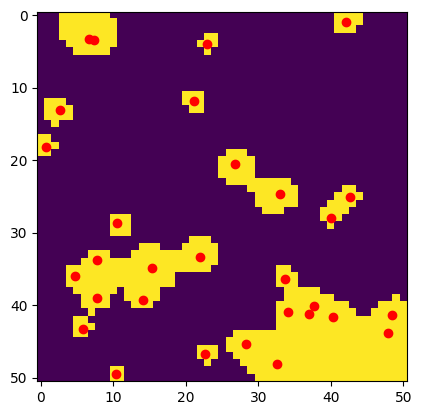

In [2384]:
pred_img_th = np.where(pred_img > 0.9, 1, 0)

plt.imshow(pred_img_th)
plt.scatter(points[:,0]/2,points[:,1]/2,c='red')


In [2385]:
qtd_samples = samples.shape[0]
input_points = samples.copy()
dist_matrix = np.zeros((qtd_samples,qtd_samples))

qtd_diff_samples = 50
th_same_cluster = 0.6

print(dist_matrix.shape) 

for i in range(qtd_samples):
    for j in range(qtd_samples):
        if i == j:
            dist_matrix[i,i] = 1
            continue
        if i > j:
            continue
        diff = (input_points[i] - input_points[j])/(qtd_diff_samples-1)
        test_samples = np.zeros((qtd_diff_samples,2))
        for k in range(qtd_diff_samples):
            test_samples[k] = (0.999*input_points[i] - diff*k)
        pred, prob = model.predict(test_samples,3)
        if len(pred[prob[:,1] < th_same_cluster]) > 0:
            dist_matrix[i,j] = 0
            dist_matrix[j,i] = 0
            if i == 14 and j == 17:
                print(test_samples)
                print(input_points[i],input_points[j])
                print(i,j,len(pred[prob[:,1] < th_same_cluster]),prob)
        else:
            dist_matrix[i,j] = 1
            dist_matrix[j,i] = 1





(30, 30)
[[56.64896811 90.67223574]
 [56.11984323 90.24059132]
 [55.59071834 89.80894689]
 [55.06159346 89.37730246]
 [54.53246858 88.94565804]
 [54.00334369 88.51401361]
 [53.47421881 88.08236918]
 [52.94509393 87.65072476]
 [52.41596904 87.21908033]
 [51.88684416 86.78743591]
 [51.35771928 86.35579148]
 [50.82859439 85.92414705]
 [50.29946951 85.49250263]
 [49.77034463 85.0608582 ]
 [49.24121974 84.62921377]
 [48.71209486 84.19756935]
 [48.18296998 83.76592492]
 [47.65384509 83.33428049]
 [47.12472021 82.90263607]
 [46.59559533 82.47099164]
 [46.06647044 82.03934721]
 [45.53734556 81.60770279]
 [45.00822068 81.17605836]
 [44.47909579 80.74441394]
 [43.94997091 80.31276951]
 [43.42084603 79.88112508]
 [42.89172114 79.44948066]
 [42.36259626 79.01783623]
 [41.83347138 78.5861918 ]
 [41.30434649 78.15454738]
 [40.77522161 77.72290295]
 [40.24609673 77.29125852]
 [39.71697184 76.8596141 ]
 [39.18784696 76.42796967]
 [38.65872208 75.99632524]
 [38.12959719 75.56468082]
 [37.60047231 75.13

In [2386]:
print("Matriz de Adjacência:")
print(dist_matrix - np.identity(dist_matrix.shape[0]))


Matriz de Adjacência:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1.

In [2387]:
import numpy as np

def expand_adjacency_matrix(dist_matrix):
    num_vertices = dist_matrix.shape[0]
    expanded_matrix = np.zeros((num_vertices, num_vertices))

    # Conectar cada vértice aos seus vizinhos e aos vizinhos dos vizinhos
    for i in range(num_vertices):
        for j in range(num_vertices):
            if dist_matrix[i, j] != 0:
                expanded_matrix[i, j] = 1  # Conectar vértice aos vizinhos
                for k in range(num_vertices):
                    if dist_matrix[j, k] != 0 and k != i:
                        expanded_matrix[i, k] = 1  # Conectar vértice aos vizinhos dos vizinhos
            

    return expanded_matrix

# Expandir a matriz de adjacência
expanded_matrix = expand_adjacency_matrix(dist_matrix)

print("Matriz de Adjacência:")
print(dist_matrix)

for i in range(10):
    expanded_matrix = expand_adjacency_matrix(expanded_matrix)
    
print("Matriz de Adjacência Expandida:")
print(expanded_matrix)


Matriz de Adjacência:
[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1.

In [2388]:
from collections import deque

def label_connected_components(adjacency_matrix):
    num_vertices = len(adjacency_matrix)
    visited = [False] * num_vertices
    labels = [-1] * num_vertices  # Inicialmente, todos os vértices têm rótulo -1
    current_label = 0

    for vertex in range(num_vertices):
        if not visited[vertex]:
            # Começar uma nova busca em largura a partir do vértice não visitado
            bfs_queue = deque([vertex])
            visited[vertex] = True

            while bfs_queue:
                current_vertex = bfs_queue.popleft()
                labels[current_vertex] = current_label

                # Encontrar vizinhos não visitados e adicioná-los à fila
                for neighbor in range(num_vertices):
                    if adjacency_matrix[current_vertex][neighbor] == 1 and not visited[neighbor]:
                        bfs_queue.append(neighbor)
                        visited[neighbor] = True

            current_label += 1  # Atualizar o rótulo para o próximo conjunto de pontos interconectados

    return labels


# Obter os rótulos dos conjuntos de pontos interconectados
labels = label_connected_components(expanded_matrix)

print("Rótulos dos Conjuntos de Pontos Interconectados:")
print(labels)



Rótulos dos Conjuntos de Pontos Interconectados:
[0, 1, 2, 1, 1, 0, 1, 3, 1, 3, 1, 3, 3, 3, 3, 4, 5, 1, 3, 6, 3, 4, 3, 1, 3, 1, 1, 1, 1, 7]


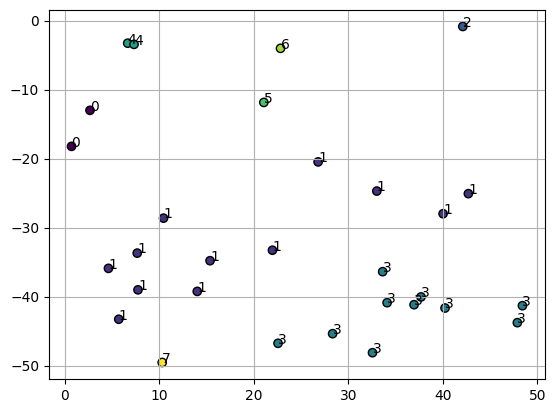

In [2389]:
fig, ax = plt.subplots()

# Plot the generated points
ax.scatter(points[:, 0]/2, -points[:, 1]/2, c=labels, marker='o', edgecolors='black')
#ax.title(f'{N} Random 2D Points')
#ax.xlabel('X Coordinate')
#ax.ylabel('Y Coordinate')
ax.grid(True)

for i, txt in enumerate(range(N)):
    ax.annotate(labels[i], (points[i,0]/2, -points[i,1]/2))

plt.show()

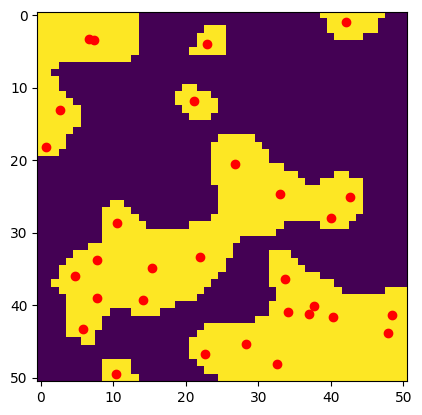

In [2390]:
pred_img_th = np.where(pred_img > th_same_cluster, 1, 0)

plt.imshow(pred_img_th)
plt.scatter(points[:,0]/2,points[:,1]/2,c='red')
for i, txt in enumerate(range(N)):
    ax.annotate(txt, (points[i,0]/2, points[i,1]/2))

plt.show()
